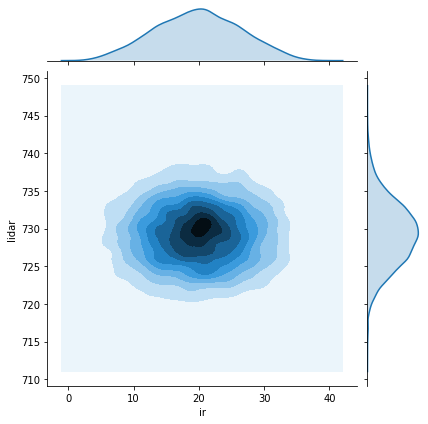

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("sensor_data_700.txt",delimiter=" ",
                   header=None,names=("date","time","ir","lidar"))

d = data[(data["time"]<160000)&(data["time"]>120000)]#12時から16時までの間のデータを抽出
d = d.loc[:,["ir","lidar"]]

sns.jointplot(d["ir"],d["lidar"],d,kind="kde")
plt.show()

In [10]:
print("光センサの計測値の分散：",d.ir.var())
print("LiDARの計測値の分散：",d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()

a = diff_ir * diff_lidar
print("共分散：",sum(a)/(len(d)-1))

d.mean()

光センサの計測値の分散： 42.11952074692658
LiDARの計測値の分散： 17.70250147019656
共分散： -0.31746881654543757


ir        19.860449
lidar    729.312191
dtype: float64

In [32]:
d.cov()

,ir,lidar
ir,42.119521,-0.317469
lidar,-0.317469,17.702501


In [37]:
from scipy.stats import multivariate_normal

irlidar = multivariate_normal(mean=d.mean().values.T,cov=d.cov().values)

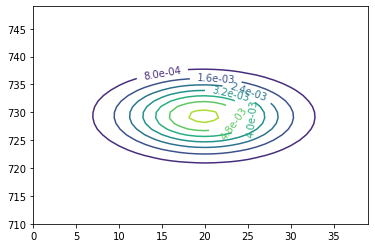

In [40]:
import numpy as np

x,y = np.mgrid[0:40,710:750]#二次元平面に均等にX座標、Y座標を作る
pos = np.empty(x.shape + (2,))#xは40x40の二次元リストで、これに３次元目を加えて40x40x2のリストを作成
pos[:,:,0] = x#加えた三次元目にx,yを代入
pos[:,:,1] = y
cont = plt.contour(x,y,irlidar.pdf(pos))#x,y座標と、それに対応する密度を算出
cont.clabel(fmt='%1.1e')#等高線に値を角込むためのフォーマット指定

plt.show()

In [42]:
print("x座標：",x)#同じ位置の値を組み合わせるとXY座標になる
print("y座標：",y)

x座標： [[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [37 37 37 ... 37 37 37]
 [38 38 38 ... 38 38 38]
 [39 39 39 ... 39 39 39]]
y座標： [[710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 ...
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]]


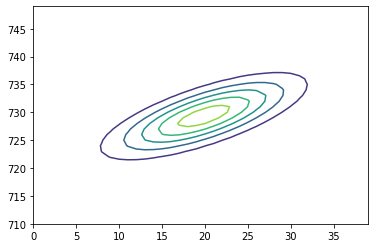

In [49]:
c = d.cov().values+np.array([[0,20],[20,0]])#行列で共分散の所だけに20足してる
tmp = multivariate_normal(mean=d.mean().values.T,cov=c)
cont=plt.contour(x,y,tmp.pdf(pos))
plt.show()